In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
insurance_dataset = pd.read_csv('/content/insurance .csv')

In [37]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
insurance_dataset.shape

(1338, 7)

In [39]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


/tmp/ipython-input-42-2694471362.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


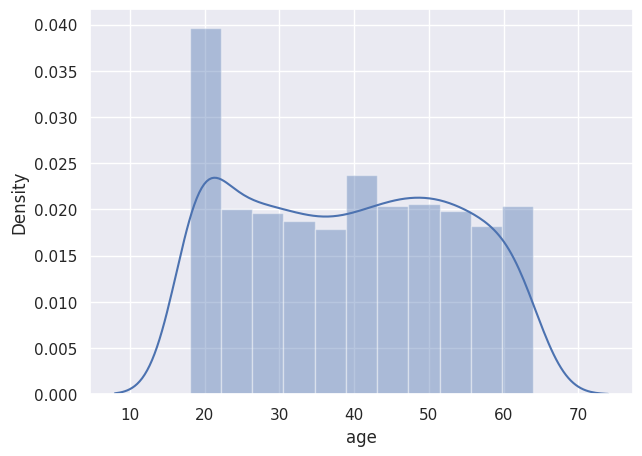

In [42]:
sns.set()
plt.figure(figsize=(7,5))
sns.distplot(insurance_dataset['age'])
plt.show()

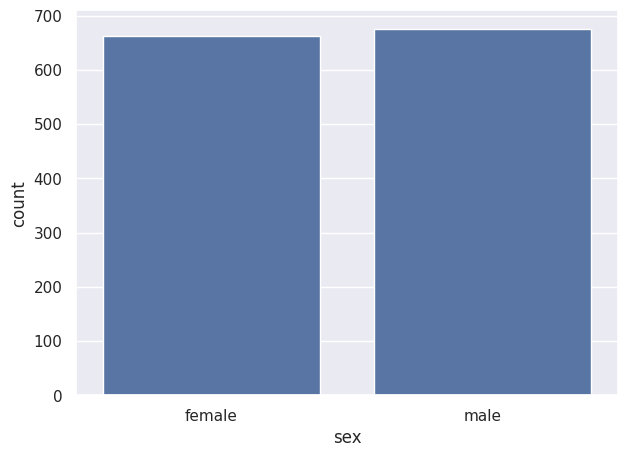

In [43]:
sns.set()
plt.figure(figsize=(7,5))
sns.countplot(x='sex', data=insurance_dataset)
plt.show()

/tmp/ipython-input-44-228400375.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


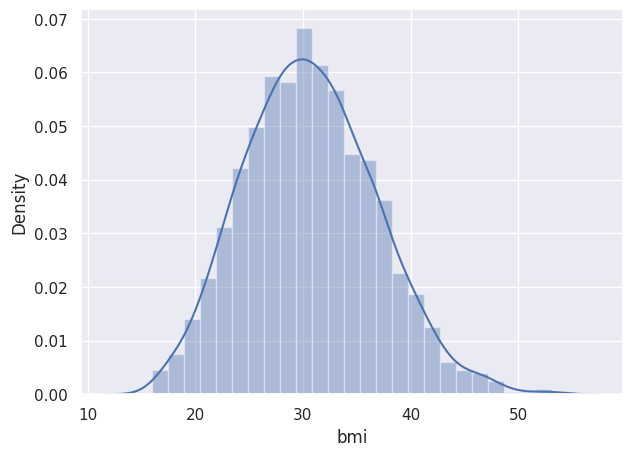

In [44]:
sns.set()
plt.figure(figsize=(7,5))
sns.distplot(insurance_dataset['bmi'])
plt.show()

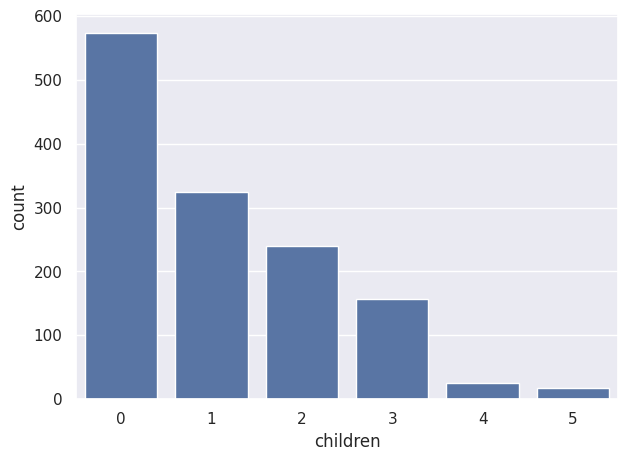

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(x='children', data=insurance_dataset)
plt.show()

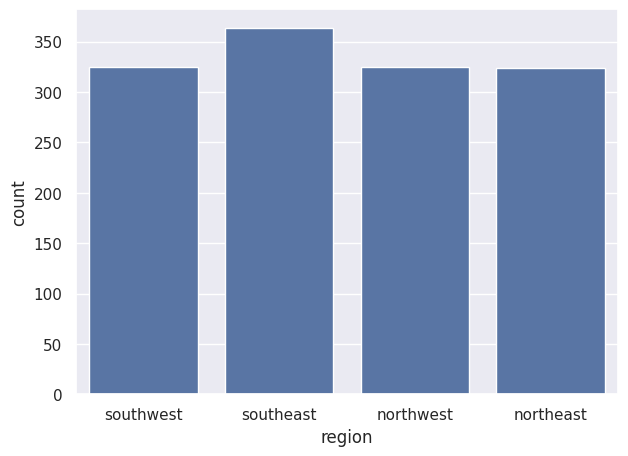

In [46]:
sns.set()
plt.figure(figsize=(7,5))
sns.countplot(x='region', data=insurance_dataset)
plt.show()

In [47]:
insurance_dataset["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 700x500 with 0 Axes>

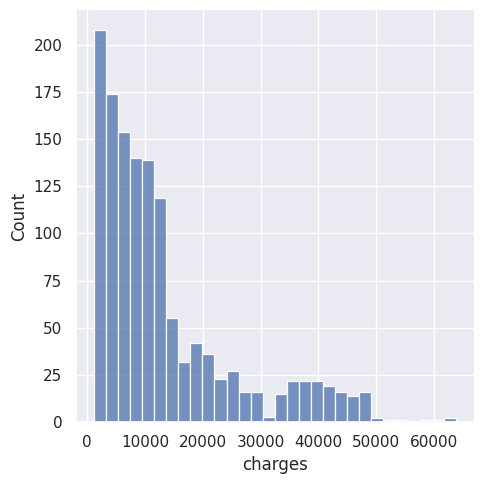

In [48]:
plt.figure(figsize=(7,5))
sns.displot(insurance_dataset['charges'])
plt.show()

In [49]:
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({"region":{"southeast":0,"southwest":1, "northeast":2, "northwest":3}}, inplace=True)

/tmp/ipython-input-49-2492392142.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
/tmp/ipython-input-49-2492392142.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
/tmp/ipython-input-49-2492392142.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

In [50]:
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [52]:
model = LinearRegression()

In [53]:
model.fit(x_train,y_train)

LinearRegression()

In [55]:
x_train_prediction = model.predict(x_train)
training_data_prediction = metrics.r2_score(y_train, x_train_prediction)

In [57]:
print(training_data_prediction)

0.751505643411174


In [58]:
x_test_prediction = model.predict(x_test)
test_data_prediction = metrics.r2_score(y_test, x_test_prediction)

In [59]:
print(test_data_prediction)

0.7447273869684076


In [63]:
input_data = [31, 1, 25.74, 0, 1, 0]

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
